In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [12]:
# Load the dataset
df = pd.read_csv("/content/17_student_performance_estimation.csv")

In [14]:
# Display basic info
print("\n=== Dataset Information ===")
print(df.info())


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   student_id      1000 non-null   object 
 1   study_hours     1000 non-null   float64
 2   absences        1000 non-null   int64  
 3   school_support  1000 non-null   object 
 4   final_grade     1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB
None


In [15]:
print("\n=== First 5 Rows ===")
print(df.head())


=== First 5 Rows ===
  student_id  study_hours  absences school_support  final_grade
0      S0001         28.9         8             no           30
1      S0002         14.8        10            yes          100
2      S0003         10.5         7            yes           87
3      S0004         18.4         7            yes           47
4      S0005         15.3         1             no           82


In [16]:
# Data Preprocessing
print("\n=== Data Preprocessing ===")
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


=== Data Preprocessing ===

Missing Values:
student_id        0
study_hours       0
absences          0
school_support    0
final_grade       0
dtype: int64


In [17]:
# Create pass/fail status (assuming final_grade is numeric)
df['pass_status'] = np.where(df['final_grade'] >= 60, 1, 0)  # 1=Pass, 0=Fail


In [18]:
# Encode all categorical variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
# Identify numeric columns for correlation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [20]:
# Prepare features and target
X = df.drop(['student_id', 'final_grade', 'pass_status'], axis=1)
y = df['pass_status']


=== Exploratory Data Analysis ===


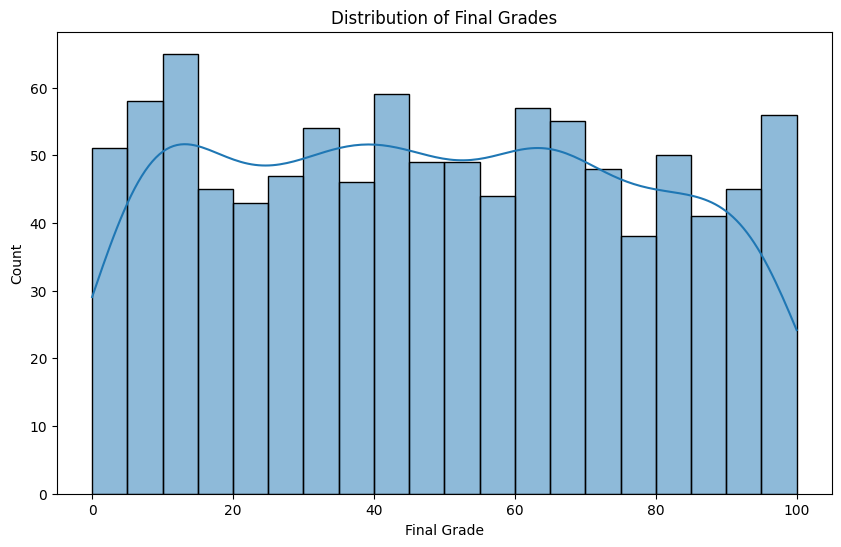

In [21]:
# Exploratory Data Analysis (EDA)
print("\n=== Exploratory Data Analysis ===")

# Plot distribution of final grades
plt.figure(figsize=(10, 6))
sns.histplot(df['final_grade'], kde=True, bins=20)
plt.title("Distribution of Final Grades")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()

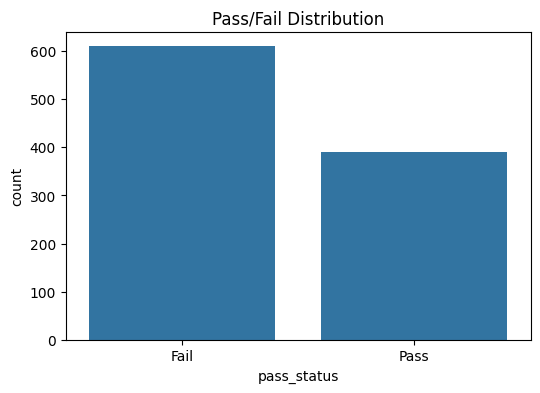

In [22]:
# Plot pass/fail distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='pass_status', data=df)
plt.title("Pass/Fail Distribution")
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.show()


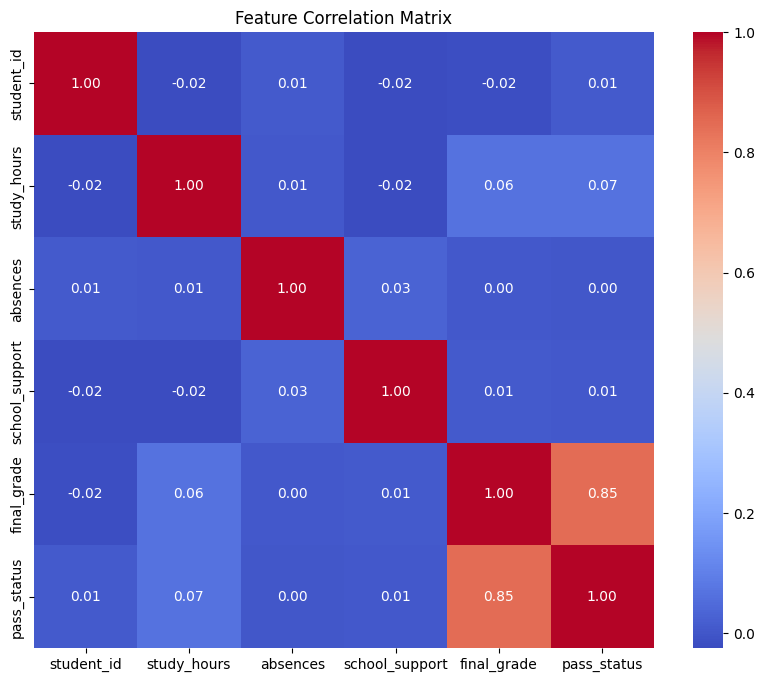

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

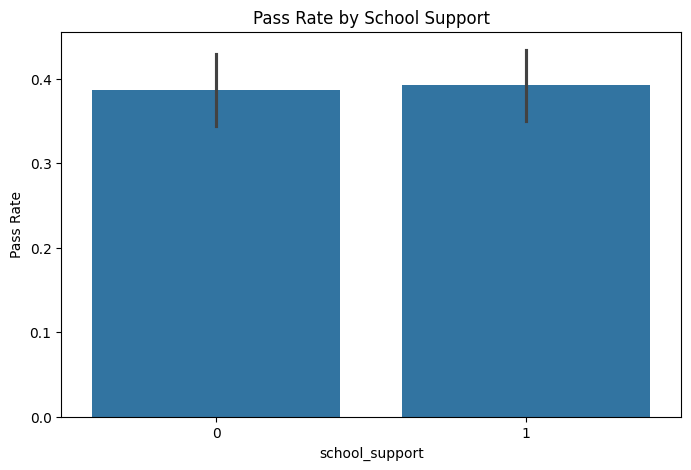

In [24]:
# Impact of school support on pass rate
plt.figure(figsize=(8, 5))
sns.barplot(x='school_support', y='pass_status', data=df)
plt.title("Pass Rate by School Support")
plt.ylabel("Pass Rate")
plt.show()

In [27]:
# Model Building
print("\n=== Model Building ===")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize and train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


=== Model Building ===


RandomForestClassifier(random_state=42)

In [28]:
# Predictions
y_pred = model.predict(X_test)

In [29]:
# Evaluation
print("\n=== Model Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.0f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== Model Evaluation ===
Accuracy: 61%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       122
           1       0.50      0.45      0.47        78

    accuracy                           0.61       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.60      0.61      0.61       200



In [30]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
          Feature  Importance
0     study_hours    0.741086
1        absences    0.248163
2  school_support    0.010751


<ipython-input-31-a146869d5977>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


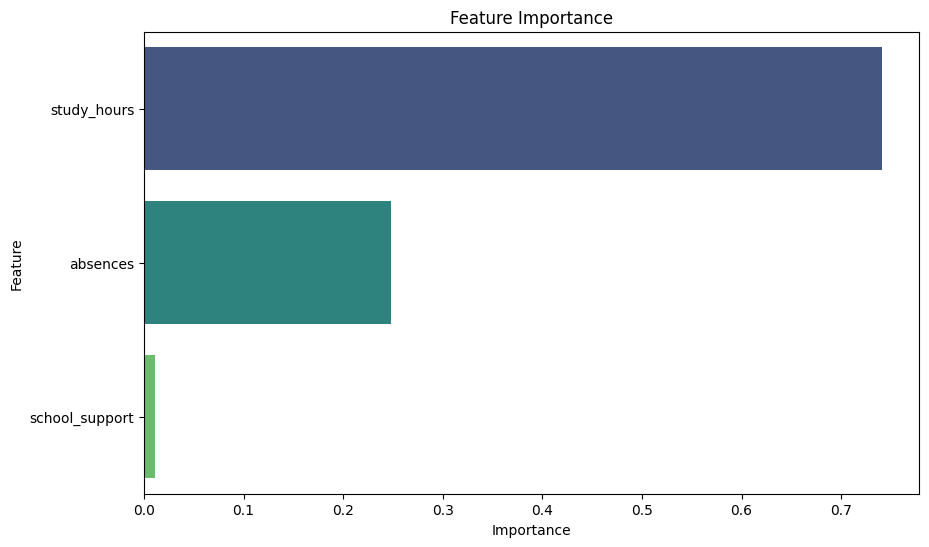

In [31]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance")
plt.show()

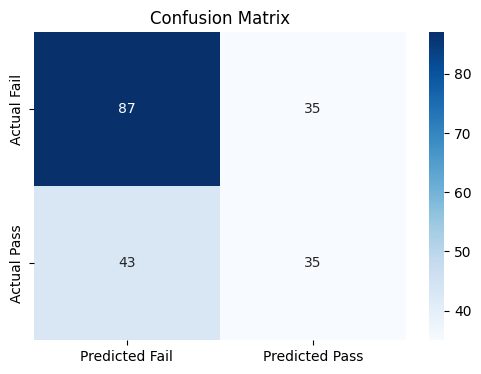

In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.title("Confusion Matrix")
plt.show()